# 【かがわAIゼミナール基礎講座】通し課題：「Kickstarter Projects」

# 1. 対象データの詳細確認

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [2]:
#データ読み込み
df_ks_original = pd.read_csv("C:/Users/shtak/Downloads/AI_lecture/exercise/ks-projects-201801/ks-projects-201801.csv")
# df_ks_original = pd.read_csv("C:/Users/604win10.KP-DOM/Desktop/work/ks-projects-201801.csv")

In [3]:
#受講者の使用データを統一。stateから「live」除去。
df_ks = df_ks_original[df_ks_original['state'] != 'live']
#受講者の使用データを統一。stateは「successful」かどうかのbooleanに。
df_ks['state'] = df_ks['state'] == 'successful' #warningは無視

C:\Users\604win10.KP-DOM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
#データの概要出力
display(df_ks.head(10))
df_ks.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,False,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,False,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,False,43,US,6240.57,6240.57,65000.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.758620e+05,3.758620e+05,3.758620e+05,375862.000000,3.720660e+05,3.758620e+05,3.758620e+05
mean,1.074660e+09,4.887465e+04,9.687431e+03,105.896866,7.080215e+03,9.082678e+03,4.532720e+04
std,6.191365e+08,1.176595e+06,9.588649e+04,909.952393,7.893105e+04,9.127075e+04,1.145865e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380103e+08,2.000000e+03,3.000000e+01,2.000000,1.800000e+01,3.100000e+01,2.000000e+03
50%,1.075277e+09,5.100000e+03,6.250000e+02,12.000000,4.000000e+02,6.274500e+02,5.480000e+03
75%,1.610139e+09,1.600000e+04,4.090000e+03,56.000000,3.056957e+03,4.064463e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#カラム名、カラム数を取得
print("【カラム名】")
print(df_ks.columns)
print("【カラム数】", len(df_ks.columns))

【カラム名】
Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')
【カラム数】 15


In [6]:
#データの詳細表示
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375862 entries, 0 to 378660
Data columns (total 15 columns):
ID                  375862 non-null int64
name                375858 non-null object
category            375862 non-null object
main_category       375862 non-null object
currency            375862 non-null object
deadline            375862 non-null object
goal                375862 non-null float64
launched            375862 non-null object
pledged             375862 non-null float64
state               375862 non-null bool
backers             375862 non-null int64
country             375862 non-null object
usd pledged         372066 non-null float64
usd_pledged_real    375862 non-null float64
usd_goal_real       375862 non-null float64
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 43.4+ MB


info()から読み取れること。  

●全データ数  
375862件 (「live」除去前の元データは378661件)  

●非数値カラム  
name  
category  
main_category  
currency  
deadline  
launched  
state  
country  
計8カラム  

●欠損値のある項目  
name → 4件  
usd pledged → 3796件  

In [7]:
#非数値カラムの詳細

#非数値カラム名のリスト
colnames_non_numeric = ["name", "category", "main_category", "currency", "deadline", "launched", "state", "country"]

#各非数値カラムのデータ種類数およびその出現数を表示  ★to_dict()を使えばより簡潔になる
for colname in colnames_non_numeric:
    print("----- " + colname + " -----")
    vc = df_ks[colname].value_counts()
    print(colname + "の種類数：", len(vc))
    #種類が50件より多ければ上位10件を、それ以下ならすべて表示する
    upperlimit_display = 10 if len(vc) > 50 else len(vc)
    print(colname + "の出現数上位" + str(upperlimit_display) + "件：")
    print(vc[0:upperlimit_display])
    print()


----- name -----
nameの種類数： 372996
nameの出現数上位10件：
New EP/Music Development      41
Canceled (Canceled)           13
Music Video                   11
N/A (Canceled)                11
New EP / Music Development    10
Cancelled (Canceled)          10
Debut Album                   10
Reflections                    9
The Journey                    9
The Awakening                  8
Name: name, dtype: int64

----- category -----
categoryの種類数： 159
categoryの出現数上位10件：
Product Design    22077
Documentary       16082
Music             15647
Tabletop Games    14072
Shorts            12311
Video Games       11744
Food              11454
Film & Video      10054
Fiction            9120
Fashion            8514
Name: category, dtype: int64

----- main_category -----
main_categoryの種類数： 15
main_categoryの出現数上位15件：
Film & Video    63253
Music           51637
Publishing      39575
Games           34944
Technology      32192
Design          29765
Art             27959
Food            24418
Fashion         225

非数値カラムについて分かったこと  
* categoryは159種
* main_categoryは15種
* currencyは14種
* stateは2種、successfulの割合は35.6%と思いのほか高い (元データは6種 → failed, successful, canceled, undefined, live, suspended)
* countryは23か国 →　思ったより少ない
* countryはUSが桁違いに多い。全体の77.4%(290887/375862)。　→　データの偏り。USとそれ以外で分けても良さそう。

各カラムとその説明は以下の通り。kaggleより。

ID: internal kickstarter id  
name: name of project  
category: category  
main_category: category of campaign  
currency: currency used to support  
deadline: deadline for crowdfunding  
goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.  
launched: date launched  
pledged: amount pledged by "crowd" ★結果  
state: Current condition the project is in ★結果  
backers: number of backers ★結果  
country: country pledged from   
usd pledged: amount of money pledged (conversion done by kickstarter) ★結果  
usd_pledged_real: amount of money pledged (conversion from Fixer.io API) ★結果  
usd_goal_real: fundraising goal (conversion from Fixer.io API) 

ここで、stateは目的変数、pledged、backers、usd pledged、usd_pledged_realは「結果」であるため説明変数には使用しない。

#### 散布図行列
ここでは、元データの散布図を表示する(サイズ別に2つ)

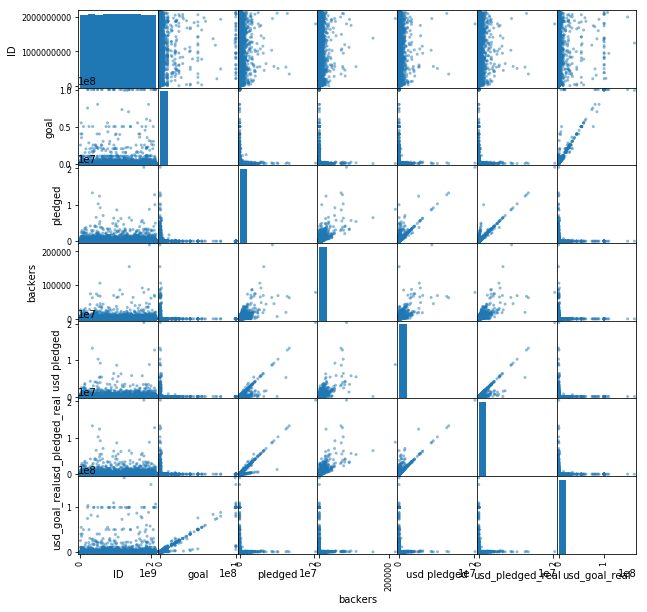

In [9]:
#散布図行列の描画
pd.plotting.scatter_matrix(df_ks_orignal, figsize=(10,10))
plt.show()

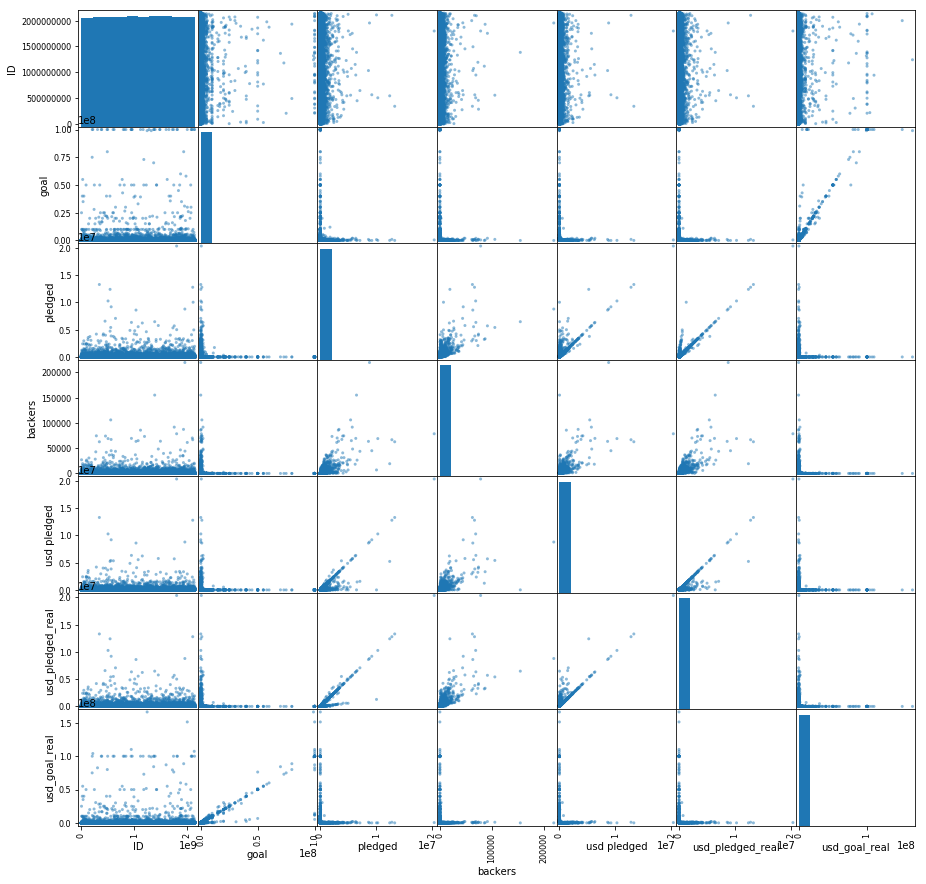

In [10]:
#散布図行列の描画
pd.plotting.scatter_matrix(df_ks_orignal, figsize=(15,15))
plt.show()

# 2. モデル作成の方針

#### 目的変数
state → true(='successful')を1に、false(='successful'以外)を0として使用。  

#### 説明変数
説明変数としては、以下が候補となる。  
category(※), main_category(※), currency(※), country(※), usd_goal_real(goalではなくこちらを採用)  
ここで※は、実際にはダミー変数を使用。  
今回は、モデル作成を簡略化するため、categoryは割愛する。  
(データを15個のmain_categoryごとに分け、categoryを採用して15個のモデルを作成すれば、さらに精度が上がるかも知れません。)  
currencyも同様の理由で割愛するが、こちらはcountryと相関関係があると思われる。  
また、新変数として、periodを導入する。periodは、「プロジェクト立ち上げからデッドラインまでの猶予期間」であり、  
period := deadline - launched  
で定義する。  
結局、説明変数としては以下を採用する。  
main_category(ダミー変数), country(ダミー変数), usd_goal_real, period

#### モデル作成手順
1. stateをbooleanから0、1に振りなおす。  
2. 説明変数のうち、必要なものはダミー変数を導入する。  
3. 新カラム「period」を導入する。  
4. データの前処理。「usd_goal_real」「period」を標準化。
5. データを、countryが「US」のグループ①と「US以外」のグループ②の2つに分割する。以後、それぞれ別のモデルを作成する(※1)。  
    1. グループ①(US)には、 ロジスティック回帰を採用。
    2. グループ②(NOT_US)には、SVMを採用。

※1 モデル選択に根拠はありません。習得したモデルの演習のためです。  


# 3. モデル作成

In [11]:
#加工用のデータフレーム作成
df_ks_with_dummies = df_ks.copy()

#目的変数stateをbooleanから{0, 1}に変更
def conv_state_to_val(state):
    if state == True:
        return 1
    else:
        return 0
df_ks_with_dummies['state'] = df_ks_with_dummies['state'].apply(conv_state_to_val)


In [12]:
#ダミー変数
dummies_mncat = pd.get_dummies(df_ks_with_dummies["main_category"], prefix="mncat")
dummies_cntry = pd.get_dummies(df_ks_with_dummies["country"], prefix="cntry")
df_ks_with_dummies = pd.concat([df_ks_with_dummies, dummies_mncat, dummies_cntry], axis=1)

In [15]:
#新しい説明変数「period」を導入
from datetime import datetime as dt

#プロジェクト立ち上げからデッドラインまでの猶予期間(日数)を返す
def get_period(deadline, launched):
    dt_deadline = dt.strptime(deadline[:10], "%Y-%m-%d")
    dt_launched = dt.strptime(launched[:10], "%Y-%m-%d")
    return (dt_deadline - dt_launched).days

df_ks_with_dummies["period"] = \
    np.vectorize(get_period)(df_ks_with_dummies["deadline"], df_ks_with_dummies["launched"])

In [60]:
#データの前処理
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

#「usd_goal_real」の標準化
df_ks_with_dummies['usd_goal_real'] = stdsc.fit_transform(df_ks_with_dummies['usd_goal_real'].values.reshape(-1, 1))

#「period」の標準化
df_ks_with_dummies['period'] = stdsc.fit_transform(df_ks_with_dummies['period'].values.reshape(-1, 1))

In [61]:
#データの分割

#USのみのデータ
df_ks_with_dummies_US = df_ks_with_dummies[df_ks_with_dummies['country'] == 'US']

#US以外のデータ
df_ks_with_dummies_notUS = df_ks_with_dummies[df_ks_with_dummies['country'] != 'US']

### ロジスティック回帰(USのみのデータ)

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from datetime import datetime as dt # 新カラム「period」作成用
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数

In [67]:
df_ks_with_dummies_US.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'mncat_Art',
       'mncat_Comics', 'mncat_Crafts', 'mncat_Dance', 'mncat_Design',
       'mncat_Fashion', 'mncat_Film & Video', 'mncat_Food', 'mncat_Games',
       'mncat_Journalism', 'mncat_Music', 'mncat_Photography',
       'mncat_Publishing', 'mncat_Technology', 'mncat_Theater', 'cntry_AT',
       'cntry_AU', 'cntry_BE', 'cntry_CA', 'cntry_CH', 'cntry_DE', 'cntry_DK',
       'cntry_ES', 'cntry_FR', 'cntry_GB', 'cntry_HK', 'cntry_IE', 'cntry_IT',
       'cntry_JP', 'cntry_LU', 'cntry_MX', 'cntry_N,0"', 'cntry_NL',
       'cntry_NO', 'cntry_NZ', 'cntry_SE', 'cntry_SG', 'cntry_US', 'period'],
      dtype='object')

In [76]:
#目的変数の設定
y_US = df_ks_with_dummies_US['state'].values

#使わないカラム名のリスト
droplist_colname = ['ID','name','category','main_category','currency','deadline','goal','launched','pledged','state','backers','country','usd pledged','usd_pledged_real']
droplist_colname_cntry = ['cntry_AT',
       'cntry_AU', 'cntry_BE', 'cntry_CA', 'cntry_CH', 'cntry_DE', 'cntry_DK',
       'cntry_ES', 'cntry_FR', 'cntry_GB', 'cntry_HK', 'cntry_IE', 'cntry_IT',
       'cntry_JP', 'cntry_LU', 'cntry_MX', 'cntry_N,0"', 'cntry_NL',
       'cntry_NO', 'cntry_NZ', 'cntry_SE', 'cntry_SG', 'cntry_US']
#説明変数の設定、使わないカラムを削除(USのみなのでcountryのダミー変数も削除)
X_US = df_ks_with_dummies_US.drop((droplist_colname + droplist_colname_cntry), axis=1).values

In [77]:
#ホールドアウト法を実行
#X_train : 学習用データの説明変数
#X_test : テスト用データの説明変数
#y_train : 学習用データの目的変数
#y_test : テスト用データの目的変数
test_size = 0.2        # 全データのうち、何20%をテストデータにする
X_US_train, X_US_test, y_US_train, y_US_test = train_test_split(X_US, y_US, test_size=test_size, random_state=1234) # テストデータはランダム選択

In [78]:
# 学習用データを使って線形回帰モデルを学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X_US_train, y_US_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=1234,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [80]:
# 学習用データに対する予測を実行
y_US_pred_train = clf.predict(X_US_train)

# 学習データに対する正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_US_train, y_US_pred_train)))


正答率 = 65.803%


In [81]:
# テストデータに対する予測を実行
y_US_pred_test = clf.predict(X_US_test)

# テストデータに対する正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_US_test, y_US_pred_test)))


正答率 = 65.662%


過去に、全データ(countryをUSとそれ以外で分けない)で出した正答率は  
正答率 = 61.247%  
だった。精度が若干向上している。  

### SVM(US以外のデータ)

In [86]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [82]:
df_ks_with_dummies_notUS.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'mncat_Art',
       'mncat_Comics', 'mncat_Crafts', 'mncat_Dance', 'mncat_Design',
       'mncat_Fashion', 'mncat_Film & Video', 'mncat_Food', 'mncat_Games',
       'mncat_Journalism', 'mncat_Music', 'mncat_Photography',
       'mncat_Publishing', 'mncat_Technology', 'mncat_Theater', 'cntry_AT',
       'cntry_AU', 'cntry_BE', 'cntry_CA', 'cntry_CH', 'cntry_DE', 'cntry_DK',
       'cntry_ES', 'cntry_FR', 'cntry_GB', 'cntry_HK', 'cntry_IE', 'cntry_IT',
       'cntry_JP', 'cntry_LU', 'cntry_MX', 'cntry_N,0"', 'cntry_NL',
       'cntry_NO', 'cntry_NZ', 'cntry_SE', 'cntry_SG', 'cntry_US', 'period'],
      dtype='object')

In [84]:
#目的変数の設定
y_notUS = df_ks_with_dummies_notUS['state'].values

#使わないカラム名のリスト
# droplist_colname = ['ID','name','category','main_category','currency','deadline','goal','launched','pledged','state','backers','country','usd pledged','usd_pledged_real']

#説明変数の設定、使わないカラムを削除
X_notUS = df_ks_with_dummies_notUS.drop((droplist_colname), axis=1).values

In [87]:
#ホールドアウト法を実行
#X_train : 学習用データの説明変数
#X_test : テスト用データの説明変数
#y_train : 学習用データの目的変数
#y_test : テスト用データの目的変数
test_size = 0.2        # 全データのうち、何20%をテストデータにする
X_notUS_train, X_notUS_test, y_notUS_train, y_notUS_test = train_test_split(X_notUS, y_notUS, test_size=test_size, random_state=1234) # テストデータはランダム選択

In [88]:
# SVMの実行
C = 5
kernel = "rbf"
gamma = 1
clf_svm = SVC(C=C, kernel=kernel, gamma=gamma)
clf_svm.fit(X_notUS_train, y_notUS_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
# 学習用データに対する予測を実行
y_notUS_pred_train = clf_svm.predict(X_notUS_train)

# 学習データに対する正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_notUS_train, y_notUS_pred_train)))


正答率 = 72.523%


In [90]:
# テストデータに対する予測を実行
y_notUS_pred_test = clf_svm.predict(X_notUS_test)

# テストデータに対する正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_notUS_test, y_notUS_pred_test)))


正答率 = 71.650%


SVMをシンプルに使用しただけだが、かなり良い結果が出た。  

# 4. 今後の課題

使用していないモデル、手法についても検討する。具体的には、  
* 正則化の使用
* 特徴選択の実施
* 木モデルの使用
* ニューラルネットワークの使用

また、今回採用したモデル内でも、ハイパーパラメータを調整することで精度の高いモデルとなる余地はあると思われる。  